Q] Predict delivery time using sorting time

In [1]:
#importing libraries and reading data 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\neetac1973\Downloads\delivery_time (1).csv")

In [3]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
#EDA
data.head() #gives first 5 rows of table

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
data.info()  #gives information about column header,null value & datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
data.shape  #gives no. of rows & columns

(21, 2)

In [7]:
data.describe()  #gives count,mean,sd,min-max,25%-50%-75% quantile range

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


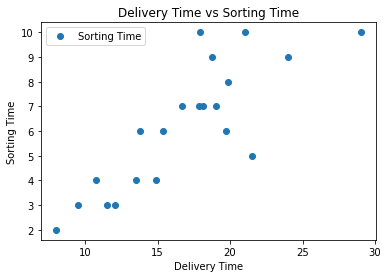

In [8]:
#Data Visualization 
data.plot(x='Delivery Time', y='Sorting Time', style='o') 
plt.title('Delivery Time vs Sorting Time')  
plt.xlabel('Delivery Time') 
plt.ylabel('Sorting Time')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

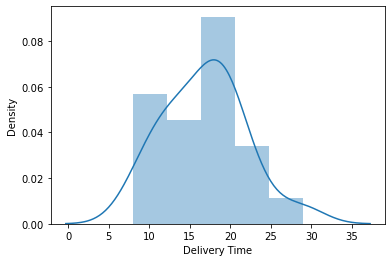

In [9]:
sns.distplot(data['Delivery Time'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

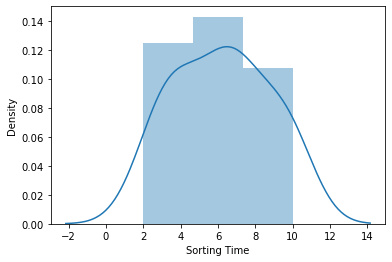

In [10]:
sns.distplot(data['Sorting Time'])

In [11]:
#Correaltion Analysis 
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


The correlation of Delivery Time with Sorting Time is 0.825997

In [12]:
#Feature Enginnering 
dataset=data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dataset

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

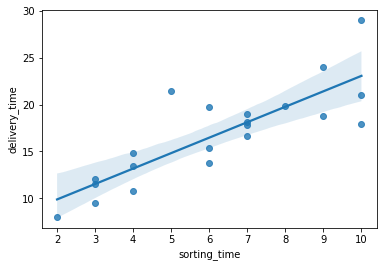

In [13]:
#Fitting a Linear Regression Model
import statsmodels.formula.api as smf
model = smf.ols("delivery_time~sorting_time",data = dataset).fit()
sns.regplot(x="sorting_time", y="delivery_time", data=dataset)

In [14]:
# Model Testing
#Coefficients
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [15]:
#t-value and p-value
print(model.tvalues, '\n', model.pvalues)

Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [16]:
# R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [17]:
#Predict for new data point
# Manual prediction for say sorting time 6
delivery_time = (6.582734) + (1.649020)*(6)
delivery_time

16.476854

In [18]:
# Automatic Prediction for say sorting time 6, 9
new_data=pd.Series([6,9])
new_data

0    6
1    9
dtype: int64

In [19]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,6
1,9


In [20]:
model.predict(data_pred)

0    16.476853
1    21.423913
dtype: float64

In [21]:
#Simple model without any transformation
# Input dataset
X = dataset['sorting_time'].values.reshape(-1,1)
print(X)
# Output or Predicted Value of data
y = dataset['delivery_time'].values.reshape(-1,1)
#print(log(y))

[[10]
 [ 4]
 [ 6]
 [ 9]
 [10]
 [ 6]
 [ 7]
 [ 3]
 [10]
 [ 9]
 [ 8]
 [ 4]
 [ 7]
 [ 3]
 [ 3]
 [ 4]
 [ 6]
 [ 7]
 [ 2]
 [ 7]
 [ 5]]


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state =42)
predict_reg = LinearRegression()


In [23]:
#train the Model using linear Regression
predict_reg.fit(X_train, y_train)

LinearRegression()

In [24]:
print(" Intercept value of Model is " ,predict_reg.intercept_)
print("Coefficient value of Model is ", predict_reg.coef_)

 Intercept value of Model is  [4.68229796]
Coefficient value of Model is  [[2.02424455]]


In [25]:
y_pred = predict_reg.predict(X_test)
pmsh_pf = pd.DataFrame({'Actual':y_test.flatten(), 'Predict': y_pred.flatten()})
pmsh_pf

,Actual,Predict
0,21.00,24.924743
1,18.11,18.852010
2,14.88,12.779276
3,13.50,12.779276
4,17.90,24.924743


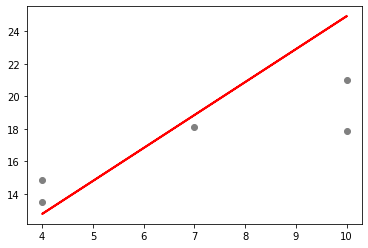

In [26]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [27]:
#Calculate Error Rate of the model.
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R^2 Score :          ", metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 2.9025888966971176
Mean Squared Error: 14.046738956635016
Root Mean Squared Error: 3.7478979383962705
R^2 Score :           -1.0207599586367362


In [28]:
# Input dataset
X_log = np.log(dataset['sorting_time'].values.reshape(-1,1))

# Output or Predicted Value of data
y_log = dataset['delivery_time'].values.reshape(-1,1)

X_train_log, X_test_1og, Y_train_log, Y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state= 42)

y_pred_log= LinearRegression()
y_pred_log.fit(X_train_log,Y_train_log)

LinearRegression()

In [29]:
print(" Intercept value of Model is " ,y_pred_log.intercept_)
print("Co-efficient Value of Log Model is : ", y_pred_log.coef_)

 Intercept value of Model is  [-0.31865575]
Co-efficient Value of Log Model is :  [[10.09551654]]


In [30]:
l_model= y_pred_log.predict(X_test_1og)
l_model

array([[22.92713014],
       [19.32631235],
       [13.6767019 ],
       [13.6767019 ],
       [22.92713014]])

In [31]:
pmsh_pf_1 = pd.DataFrame({'Actual':Y_test_log.flatten(), 'Predict': l_model.flatten()})
pmsh_pf_1

,Actual,Predict
0,21.00,22.927130
1,18.11,19.326312
2,14.88,13.676702
3,13.50,13.676702
4,17.90,22.927130


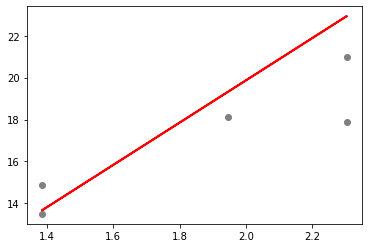

In [32]:
plt.scatter(X_test_1og, Y_test_log,  color='gray')
plt.plot(X_test_1og, l_model, color='red', linewidth=2)
plt.show()

In [33]:
#Calculate Error Rate of the Logrithm Transformation model.
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_log, l_model))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_log, l_model) ) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_log, l_model)))
print("R^2 Score :          ", metrics.r2_score(Y_test_log, l_model))


Mean Absolute Error: 1.910114526185978
Mean Squared Error: 6.388886730349971
Root Mean Squared Error: 2.5276247210276233
R^2 Score :           0.08089653229737481


In [34]:
#Exponential Transformation Model

# Input dataset
X_e_log = dataset['sorting_time'].values.reshape(-1,1)

# Output or Predicted Value of data
y_e_log = np.log(dataset['delivery_time'].values.reshape(-1,1))

X_train_exp, X_test_exp, Y_train_exp, Y_test_exp = train_test_split(X_e_log, y_e_log, test_size=0.2, random_state= 42)

exp_model= LinearRegression()
exp_model.fit(X_train_exp, Y_train_exp)

LinearRegression()

In [35]:
print(" Exponent Model Intercept value is ", exp_model.intercept_)
print(" Exponent model Coefficient value is ", exp_model.coef_)

 Exponent Model Intercept value is  [1.9917351]
 Exponent model Coefficient value is  [[0.12920274]]


In [37]:
exp_model_pred= exp_model.predict(X_test_exp)
exp_model_pred

array([[3.28376247],
       [2.89615425],
       [2.50854604],
       [2.50854604],
       [3.28376247]])

In [38]:
pmsh_exp = pd.DataFrame({'Actual':Y_test_exp.flatten(), 'Predict': exp_model_pred.flatten()})
pmsh_exp

,Actual,Predict
0,3.044522,3.283762
1,2.896464,2.896154
2,2.700018,2.508546
3,2.602690,2.508546
4,2.884801,3.283762


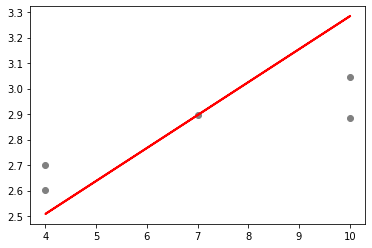

In [39]:
plt.scatter(X_test_exp, Y_test_exp,  color='gray')
plt.plot(X_test_exp, exp_model_pred, color='red', linewidth=2)
plt.show()

In [40]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_exp, exp_model_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_exp, exp_model_pred) ) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_exp, exp_model_pred)))
print("R^2 Score :          ", metrics.r2_score(Y_test_exp, exp_model_pred))

Mean Absolute Error: 0.18482548465812493
Mean Squared Error: 0.052386182564572156
Root Mean Squared Error: 0.22888027998185462
R^2 Score :           -1.1485016492474158


Conclusion
WE have found that while transforming the model, we got various values for MAE, RMSE, MSE and R 2 Values. Summery of the following Models


Simple linear Regression Model
Mean Absolute Error: 2.9025888966971176 Mean Squared Error: 14.046738956635016 Root Mean Squared Error: 3.7478979383962705 R^2 Score : -1.0207599586367362


Logrithm Transformation Model
Mean Absolute Error: 1.910114526185978 Mean Squared Error: 6.388886730349971 Root Mean Squared Error: 2.5276247210276233 R^2 Score : 0.08089653229737481


Exponential Transformation Model
Mean Absolute Error: 0.18482548465812493 Mean Squared Error: 0.052386182564572156 Root Mean Squared Error: 0.22888027998185462 R^2 Score : -1.1485016492474158